<a href="https://colab.research.google.com/github/unjike/Modeling-and-Simulation-of-Advanced-Manufacturing-Processes/blob/main/Genetic_Algorithm_for_Material_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
## Ursan Tchouteng Njike
## MS C289
## Project 7

## Importing usefull libraries
import numpy as np
import matplotlib.pyplot as plt
 
##initializing constants
k_1 = 80*10**9 # Pa                       <---           Phase 1 bulk modulus
mu_1 = 30*10**9 # Pa                      <---           Phase 1 shear modulus
sigma_1 = 1.0*10**7 # S/m                 <---           Phase 1 electrical conductivity
Kappa_1 = 4.3 # W/m-K                     <---           Phase 1 thermal conductivity
k_D = 111*10**9 # Pa                      <---           Desired Effective Bulk Modulus
mu_D = 47*10**9 # Pa                      <---           Desired Effective Shear Modulus
sigma_D = 2.1*10**7 # S/m                 <---           Desired Effective Electrical Conductivity
Kappa_D = 6.2 # W/m-K                     <---           Desired Effective Thermal Conductivity
TOL_k = 0.5 #                             <---           Bulk Modulus Tolerance
TOL_mu = 0.5 #                            <---           Shear Modulus Tolerance
TOL_sigma = 0.8 #                         <---           Electrical Tolerance
TOL_Kappa = 0.5 #                         <---           Thermal Tolerance
w = 0.8 #                                 <---           Concentration tensor weights
w_1 = 1 #                                 <---           Material property matching cost function weights


# Genetic Algorithm for Material Optimization
# Initializing genetic algorithm parameters
children = 10 #                           <---           number of children
parent = 10 #                             <---           number of parents
S = 200 #                                 <---           number of genes
G = 5000 #                                <---           total generation

W_1 = 1/3 #                               <---           cost function weight
W_2 = 1/3 #                               <---           cost function weight
W_3 = 1/3 #                               <---           cost function weight

def PI_function(k_2, mu_2, sigma_2, Kappa_2, v_2):
  #evaluating k_str, mu_str, sigma_str, K_str
  v_1 = 1-v_2
  k_strpls = k_2 + (1 - v_2)/(1/(k_1 - k_2) + 3*v_2/(3*k_2 + 4*mu_2))
  k_strmns = k_1 + v_2/(1/(k_2 - k_1) + 3*(1 - v_2)/(3*k_1 + 4*mu_1))
  k_str = (k_strpls + k_strmns)/2

  mu_strpls = mu_2 + (1 - v_2)/(1/(mu_1 - mu_2) + 6*v_2*(k_2 + 2*mu_2)/(5*mu_2*(3*k_2 + 4*mu_2)))
  mu_strmns = mu_1 + v_2/(1/(mu_2 - mu_1) + 6*(1-v_2)*(k_1 + 2*mu_1)/(5*mu_1*(3*k_1 + 4*mu_1)))
  mu_str = (mu_strpls + mu_strmns)/2

  sigma_strpls = sigma_2 + (1 - v_2)/(1/(sigma_1 - sigma_2) + v_2/(3*sigma_2))
  sigma_strmns = sigma_1 + v_2/(1/(sigma_2 - sigma_1) + (1-v_2)/(3*sigma_1))
  sigma_str = (sigma_strpls + sigma_strmns)/2

  Kappa_strpls = Kappa_2 + (1 - v_2)/(1/(Kappa_1 - Kappa_2) + v_2/(3*Kappa_2))
  Kappa_strmns = Kappa_1 + v_2/(1/(Kappa_2 - Kappa_1) + (1-v_2)/(3*Kappa_1))
  Kappa_str = (Kappa_strpls + Kappa_strmns)/2

  # evaluating C_sigma_k2, C_sigma_k1, C_sigma_mu2, C_sigma_mu1 for mechanical properties
  C_sigma_k2 = k_2*(k_str-k_1)/(v_2*k_str*(k_2-k_1))
  C_sigma_mu2 = mu_2*(mu_str-mu_1)/(v_2*mu_str*(mu_2-mu_1))

  C_sigma_k1 = (1 - v_2*C_sigma_k2**2)/v_1
  C_sigma_mu1 = (1 - v_2*C_sigma_mu2**2)/v_1


  # evaluating C_j1C_e1 and C_j1C_e1 for electrical properties
  C_j1C_e1 = sigma_1 * ((sigma_2 - sigma_str)/((1-v_2)*(sigma_2 - sigma_1)))**2 / sigma_str
  C_j2C_e2 = sigma_2 * ((sigma_str - sigma_1)/(v_2*(sigma_2 - sigma_1)))**2 / sigma_str

  # evaluating C_q1 and C_q2 for thermal properties
  C_theta2 = (Kappa_str - Kappa_1)/(v_2*(Kappa_2 - Kappa_1)) 
  C_theta1 = (1 - v_2*C_theta2)/(1 - v_2)
  C_q2 = Kappa_2*C_theta2/Kappa_str
  C_q1 = (1 - v_2*C_q2)/(1 - v_2)

  # running the numerical simulation for the mechical properties
  pi_mechanical = w_1*((k_D-k_str)/k_D)**2 + w_1*((mu_D-mu_str)/mu_D)**2 + int(C_sigma_k2 > TOL_k)*w*((C_sigma_k2 - TOL_k)/TOL_k)**2 + int(C_sigma_mu2 > TOL_mu)*w*((C_sigma_mu2 - TOL_mu)/TOL_mu)**2 + int(C_sigma_k1 > TOL_k)*w*((C_sigma_k1 - TOL_k)/TOL_k)**2 + int(C_sigma_mu1 > TOL_mu)*w*((C_sigma_mu1 - TOL_mu)/TOL_mu)**2

  # running the numerical simulation for the electrical properties
  pi_electrical = w_1*((sigma_D-sigma_str)/sigma_D)**2 + int(C_j1C_e1 > TOL_sigma)*w*((C_j1C_e1 - TOL_sigma)/TOL_sigma)**2 + int(C_j2C_e2 > TOL_sigma)*w*((C_j2C_e2 - TOL_sigma)/TOL_sigma)**2 

  # running the numerical simulation for the thermal properties
  pi_thermal = w_1*((Kappa_D - Kappa_str)/Kappa_D)**2 + int(C_q1 > TOL_sigma)*w*((C_q1 - TOL_sigma)/TOL_sigma)**2 + int(C_q2 > TOL_sigma)*w*((C_q1 - TOL_sigma)/TOL_sigma)**2 

  # sim_res = [trnsTempSim(21, Lambda[i,0],Lambda[i,1]) for i in range(S)]

  # evaluating the cost of each member of the population
  new_pi = W_1*pi_mechanical + W_2*pi_electrical + W_3*pi_thermal

  return new_pi

---------------------generation 1 ---------------------
PI_min:  3.830347510059049
PI_min:  2.167329938285006
λ₁: 6560816858601.257, λ₂: 51733228603.89693, λ₃: 261717784.5328644, λ₄: 23.41691147662838, λ₅: 0.3411813304660447


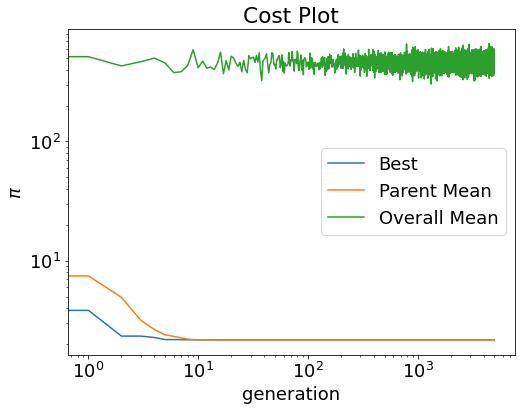

---------------------generation 1 ---------------------
PI_min:  3.94412976082545
PI_min:  3.928948074668236
λ₁: 1855226946303.6643, λ₂: 101176776641.5249, λ₃: 447276120.290131, λ₄: 90.3478002218863, λ₅: 0.20524730649655723


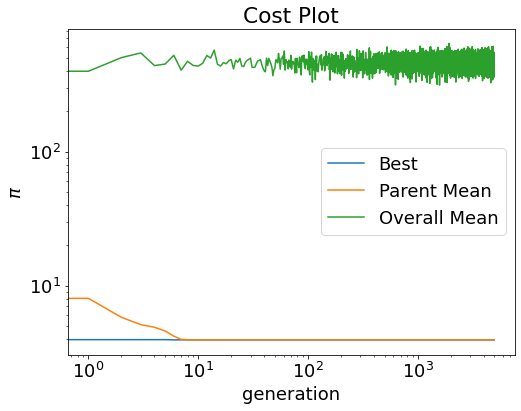

---------------------generation 1 ---------------------
PI_min:  2.6736775094686043
PI_min:  1.8794322955667446
λ₁: 3435841109856.0684, λ₂: 56997135074.33873, λ₃: 186512854.88503695, λ₄: 19.69720854100222, λ₅: 0.2733060081929449


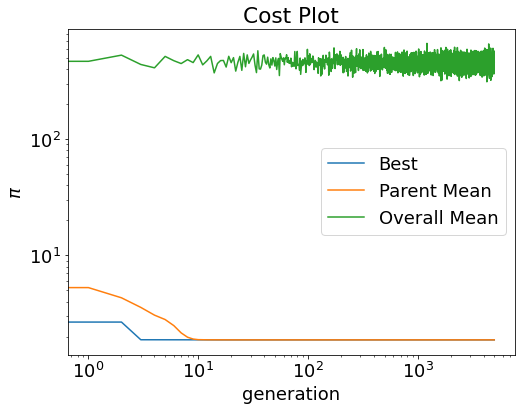

---------------------generation 1 ---------------------
PI_min:  6.266576899599187
PI_min:  3.3554016484612896
λ₁: 824786713158.8176, λ₂: 195356822673.0819, λ₃: 51169768.74907184, λ₄: 48.88256191951014, λ₅: 0.4536788141727516


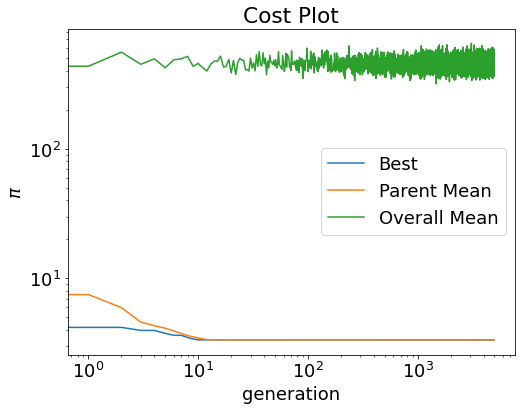

---------------------generation 1 ---------------------
PI_min:  2.731659351995038
PI_min:  2.5638090818674804
λ₁: 3021450082613.29, λ₂: 90564278749.88214, λ₃: 53062231.89241478, λ₄: 54.4244003394234, λ₅: 0.33721029435192024


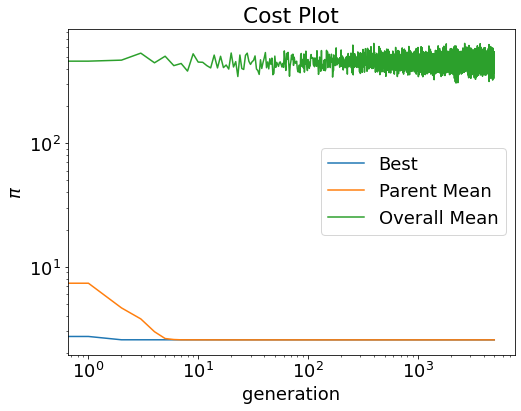

---------------------generation 1 ---------------------
PI_min:  8.294107515930554
PI_min:  5.6459518473527766
λ₁: 2168845668905.5164, λ₂: 87981444681.29004, λ₃: 215057570.7252463, λ₄: 255.92058552885635, λ₅: 0.19804321065968394


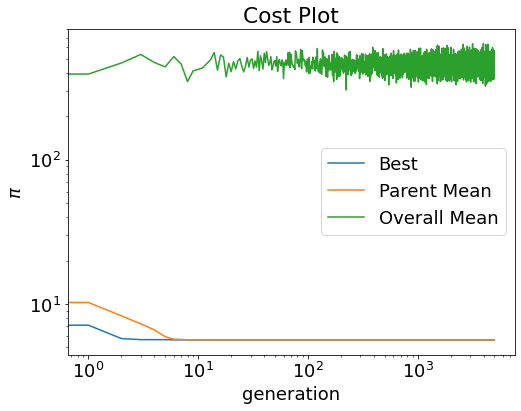

---------------------generation 1 ---------------------
PI_min:  2.675141729362242
PI_min:  2.675141729362239
λ₁: 320912253428.0281, λ₂: 55921734885.21219, λ₃: 373149815.8300358, λ₄: 117.93840521170237, λ₅: 0.17268835063927412


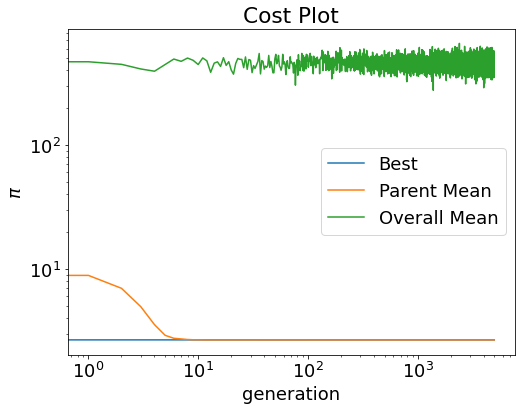

---------------------generation 1 ---------------------
PI_min:  4.823175786638016
PI_min:  3.042022313623497
λ₁: 3200458078979.3955, λ₂: 83899619665.10165, λ₃: 226571835.67923182, λ₄: 84.43684449740726, λ₅: 0.21543444364221434


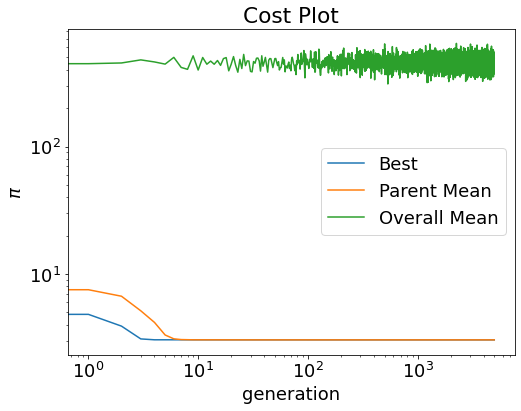

---------------------generation 1 ---------------------
PI_min:  3.5369526278413392
PI_min:  1.8690105775095656
λ₁: 4508351801914.937, λ₂: 50252469559.67961, λ₃: 75552298.78500828, λ₄: 43.80168197493681, λ₅: 0.38311821740890434


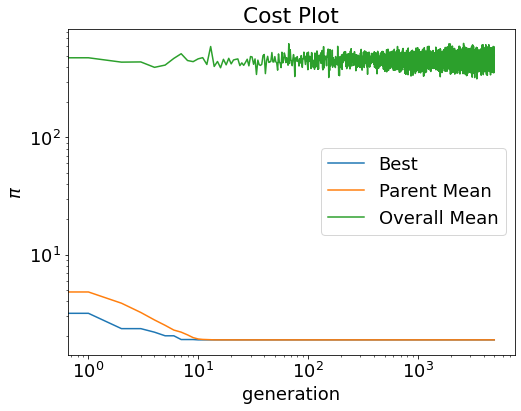

---------------------generation 1 ---------------------
PI_min:  4.089052191563569
PI_min:  4.088240132056358
λ₁: 585902822025.0513, λ₂: 114783212900.19632, λ₃: 356476966.8081105, λ₄: 123.79103374258409, λ₅: 0.15874683333520784


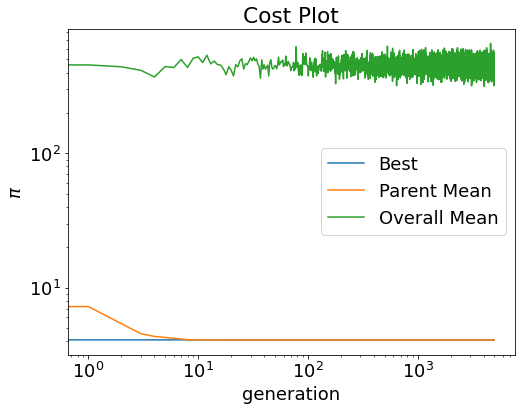

---------------------generation 1 ---------------------
PI_min:  2.8761459271604104
PI_min:  2.3505660118691147
λ₁: 6759137605712.98, λ₂: 63182569813.644516, λ₃: 263910117.26904467, λ₄: 42.28827468209556, λ₅: 0.22978315614103978


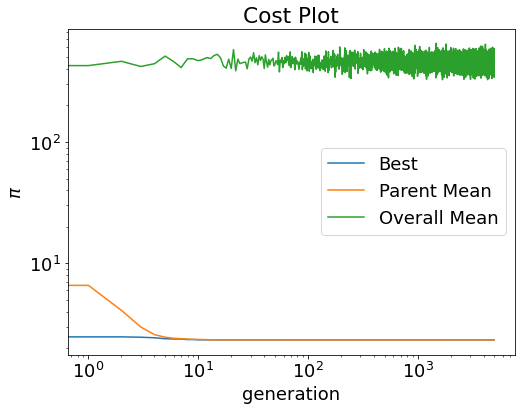

---------------------generation 1 ---------------------
PI_min:  7.57484393421273
PI_min:  7.028909202530507
λ₁: 2479412705390.959, λ₂: 367447971960.64087, λ₃: 174959808.4415524, λ₄: 84.12309985870937, λ₅: 0.289715234381742


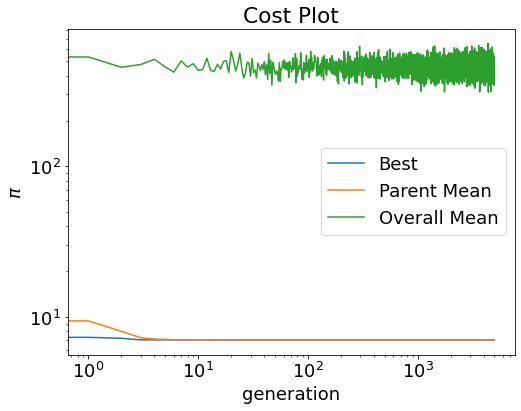

---------------------generation 1 ---------------------
PI_min:  1.7449468410309739
PI_min:  1.7443993745614632
λ₁: 2764482382395.6396, λ₂: 45635934304.82858, λ₃: 14029238.880230399, λ₄: 26.720006838829747, λ₅: 0.23594404461397028


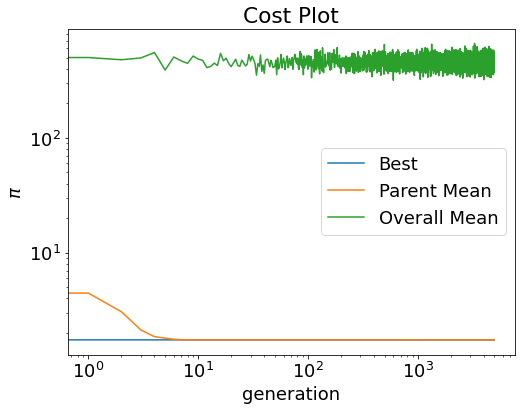

---------------------generation 1 ---------------------
PI_min:  3.24803327336424
PI_min:  2.2287052964299727
λ₁: 1509983694292.6267, λ₂: 43152934797.37952, λ₃: 356437784.03732014, λ₄: 19.079696559981855, λ₅: 0.27960288723050886


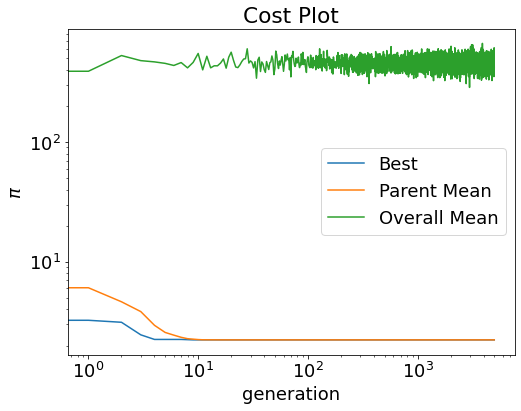

---------------------generation 1 ---------------------
PI_min:  2.753133325127536
PI_min:  2.4899354295328493
λ₁: 119682048396.32117, λ₂: 82103130187.16095, λ₃: 388222073.2506556, λ₄: 72.51086372168638, λ₅: 0.18425902763209745


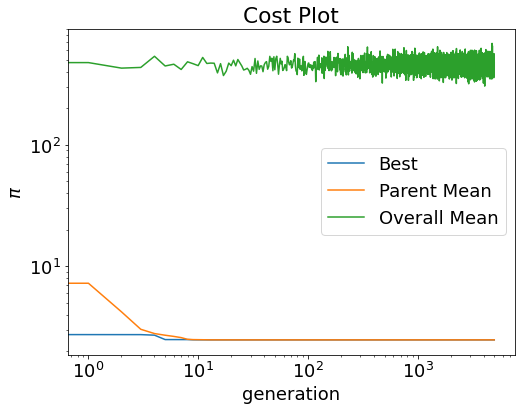

---------------------generation 1 ---------------------
PI_min:  9.040941519242182
PI_min:  2.9482851902586513
λ₁: 3635346860603.5273, λ₂: 90551644868.77823, λ₃: 141370428.99199802, λ₄: 59.724446972059894, λ₅: 0.38515444415607086


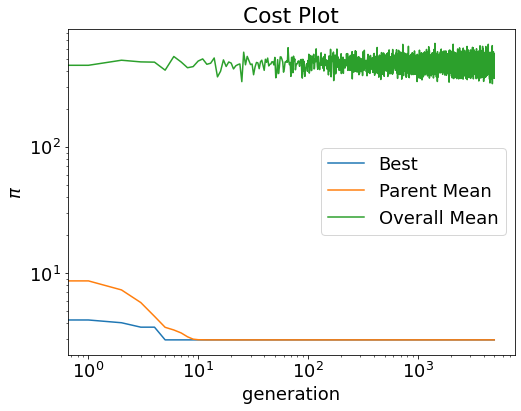

---------------------generation 1 ---------------------
PI_min:  4.681261906594448
PI_min:  3.450472572478647
λ₁: 5924795640882.107, λ₂: 75094529446.95398, λ₃: 406096757.5913893, λ₄: 106.23352622293714, λ₅: 0.20769578865610333


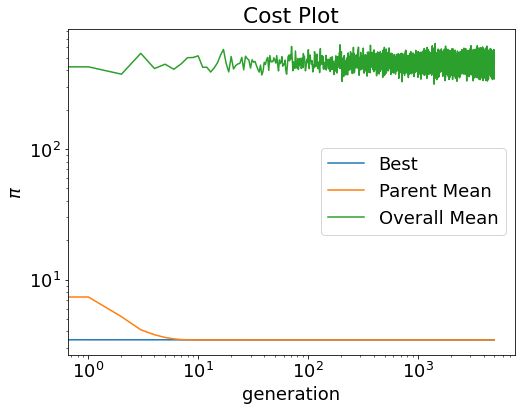

---------------------generation 1 ---------------------
PI_min:  2.9049473901525014
PI_min:  2.0369115642769593
λ₁: 2485032926909.984, λ₂: 54873469262.79295, λ₃: 230916339.54968607, λ₄: 36.23750903990663, λ₅: 0.25242418583180376


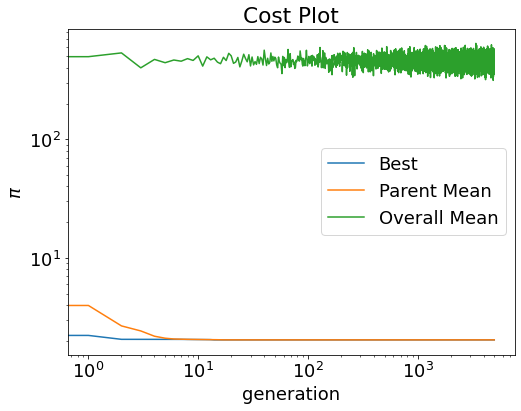

---------------------generation 1 ---------------------
PI_min:  2.7787208707586317
PI_min:  2.772929320962466
λ₁: 4115511900751.457, λ₂: 160658530260.56854, λ₃: 106688623.21271211, λ₄: 6.9481474775881065, λ₅: 0.44752846853830985


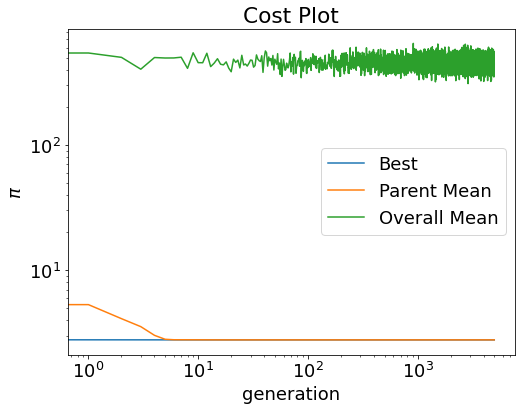

---------------------generation 1 ---------------------
PI_min:  5.591463497235685
PI_min:  3.571965309162262
λ₁: 586085566084.5405, λ₂: 153117031325.83783, λ₃: 303392419.2822546, λ₄: 35.02423086100009, λ₅: 0.3422503470432695


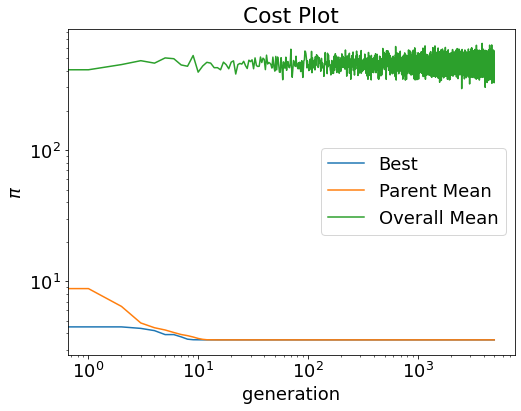

In [28]:
for iter in range(20):
  # random number genration
  rng = np.random.default_rng()

  # generating k array of size S of values between 
  k_2 = 99*k_1*rng.random((S,1)) + k_1

  # generating mu array of size S of values between 
  mu_2 = 99*mu_1*rng.random((S,1)) + mu_1

  # generating sigma array of size S of values between 
  sigma_2 = 99*sigma_1*rng.random((S,1)) + sigma_1

  # generating K array of size S of values between 
  Kappa_2 = 99*Kappa_1*rng.random((S,1)) + Kappa_1

  # generating v array of size S of values between 
  v_2 = rng.random((S,1))
  v_1 = 1-v_2                         

  # organizing the tunable parameter generated for the genetic algorithm
  Lambda = np.hstack([k_2, mu_2, sigma_2, Kappa_2, v_2])

  #evaluating k_str, mu_str, sigma_str, K_str
  k_strpls = k_2 + (1 - v_2)/(1/(k_1 - k_2) + 3*v_2/(3*k_2 + 4*mu_2))
  k_strmns = k_1 + v_2/(1/(k_2 - k_1) + 3*(1 - v_2)/(3*k_1 + 4*mu_1))
  k_str = (k_strpls + k_strmns)/2

  mu_strpls = mu_2 + (1 - v_2)/(1/(mu_1 - mu_2) + 6*v_2*(k_2 + 2*mu_2)/(5*mu_2*(3*k_2 + 4*mu_2)))
  mu_strmns = mu_1 + v_2/(1/(mu_2 - mu_1) + 6*(1-v_2)*(k_1 + 2*mu_1)/(5*mu_1*(3*k_1 + 4*mu_1)))
  mu_str = (mu_strpls + mu_strmns)/2

  sigma_strpls = sigma_2 + (1 - v_2)/(1/(sigma_1 - sigma_2) + v_2/(3*sigma_2))
  sigma_strmns = sigma_1 + v_2/(1/(sigma_2 - sigma_1) + (1-v_2)/(3*sigma_1))
  sigma_str = (sigma_strpls + sigma_strmns)/2

  Kappa_strpls = Kappa_2 + (1 - v_2)/(1/(Kappa_1 - Kappa_2) + v_2/(3*Kappa_2))
  Kappa_strmns = Kappa_1 + v_2/(1/(Kappa_2 - Kappa_1) + (1-v_2)/(3*Kappa_1))
  Kappa_str = (Kappa_strpls + Kappa_strmns)/2

  # evaluating C_sigma_k2, C_sigma_k1, C_sigma_mu2, C_sigma_mu1 for mechanical properties
  C_sigma_k2 = k_2*(k_str-k_1)/(v_2*k_str*(k_2-k_1))
  C_sigma_mu2 = mu_2*(mu_str-mu_1)/(v_2*mu_str*(mu_2-mu_1))

  C_sigma_k1 = (1 - v_2*C_sigma_k2**2)/v_1
  C_sigma_mu1 = (1 - v_2*C_sigma_mu2**2)/v_1


  # evaluating C_j1C_e1 and C_j1C_e1 for electrical properties
  C_j1C_e1 = sigma_1 * ((sigma_2 - sigma_str)/((1-v_2)*(sigma_2 - sigma_1)))**2 / sigma_str
  C_j2C_e2 = sigma_2 * ((sigma_str - sigma_1)/(v_2*(sigma_2 - sigma_1)))**2 / sigma_str

  # evaluating C_q1 and C_q2 for thermal properties
  C_theta2 = (Kappa_str - Kappa_1)/(v_2*(Kappa_2 - Kappa_1)) 
  C_theta1 = (1 - v_2*C_theta2)/(1 - v_2)
  C_q2 = Kappa_2*C_theta2/Kappa_str
  C_q1 = (1 - v_2*C_q2)/(1 - v_2)

  # running the numerical simulation for the mechical properties
  pi_mechanical = np.array([w_1*((k_D-k_str[i])/k_D)**2 + w_1*((mu_D-mu_str[i])/mu_D)**2 + int(C_sigma_k2[i] > TOL_k)*w*((C_sigma_k2[i] - TOL_k)/TOL_k)**2 + int(C_sigma_mu2[i] > TOL_mu)*w*((C_sigma_mu2[i] - TOL_mu)/TOL_mu)**2 + int(C_sigma_k1[i] > TOL_k)*w*((C_sigma_k1[i] - TOL_k)/TOL_k)**2 + int(C_sigma_mu1[i] > TOL_mu)*w*((C_sigma_mu1[i] - TOL_mu)/TOL_mu)**2 for i in range(S)])

  # running the numerical simulation for the electrical properties
  pi_electrical = np.array([w_1*((sigma_D-sigma_str[i])/sigma_D)**2 + int(C_j1C_e1[i] > TOL_sigma)*w*((C_j1C_e1[i] - TOL_sigma)/TOL_sigma)**2 + int(C_j2C_e2[i] > TOL_sigma)*w*((C_j2C_e2[i] - TOL_sigma)/TOL_sigma)**2 for i in range(S)])

  # running the numerical simulation for the thermal properties
  pi_thermal = np.array([w_1*((Kappa_D - Kappa_str[i])/Kappa_D)**2 + int(C_q1[i] > TOL_sigma)*w*((C_q1[i] - TOL_sigma)/TOL_sigma)**2 + int(C_q2[i] > TOL_sigma)*w*((C_q1[i] - TOL_sigma)/TOL_sigma)**2 for i in range(S)])

  # sim_res = [trnsTempSim(21, Lambda[i,0],Lambda[i,1]) for i in range(S)]

  # evaluating the cost of each member of the population
  new_pi = W_1*pi_mechanical + W_2*pi_electrical + W_3*pi_thermal

  # initializing the generation count
  g = 1

  # labeling the data
  dtype = [('Lambda1', float), ('Lambda2', float), ('Lambda3', float), ('Lambda4', float), ('Lambda5', float), ('new_pi', float)]

  # Organzing the data for each member of the population
  Pi=[]
  for _ in range(S):
      Pi.append((Lambda[_][0], Lambda[_][1], Lambda[_][2], Lambda[_][3], Lambda[_][4], float(new_pi[_])))

  # converting to an array and sorting the list of the population over the new pi
  Pi1 = np.array(Pi, dtype=dtype)
  Sorted_Pi = np.sort(Pi1, order='new_pi')

  g = 1

  # initializing variable tracking the GA performance
  Parent_avg = []
  PI_avg = []
  PI_min = []
  Sol1 = []
  Sol2 = []
  Sol3 = []
  Sol4 = []
  Sol5 = []

  PI_min.append(Sorted_Pi['new_pi'][0])
  Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
  PI_avg.append(Sorted_Pi['new_pi'].mean())
  Sol1.append(Sorted_Pi['Lambda1'][0])
  Sol2.append(Sorted_Pi['Lambda2'][0])
  print('---------------------generation', g, '---------------------')
  # print('K_o: ', Sol1[-1], '\nfl: ', Sol2[-1])
  print('PI_min: ', PI_min[-1])
  #==========================================================================================================================
  # genetic algorithm iteration
  while g<G:
      g+=1
      for p in 2*np.arange(0,5):
          phi1 = rng.random()
          phi2 = rng.random()
          phi3 = rng.random()
          phi4 = rng.random()
          phi5 = rng.random()
          phi1a = rng.random()
          phi2a = rng.random()
          phi3a = rng.random()
          phi4a = rng.random()
          phi5a = rng.random()
          
          ## mating parents to produce children that replaces worse parents
          Sorted_Pi['Lambda1'][p+10] =  phi1*Sorted_Pi['Lambda1'][p] + (1-phi1)*Sorted_Pi['Lambda1'][p+1]
          Sorted_Pi['Lambda2'][p+10] =  phi2*Sorted_Pi['Lambda2'][p] + (1-phi2)*Sorted_Pi['Lambda2'][p+1]
          Sorted_Pi['Lambda3'][p+10] =  phi3*Sorted_Pi['Lambda3'][p] + (1-phi3)*Sorted_Pi['Lambda3'][p+1]
          Sorted_Pi['Lambda4'][p+10] =  phi4*Sorted_Pi['Lambda4'][p] + (1-phi4)*Sorted_Pi['Lambda4'][p+1]
          Sorted_Pi['Lambda5'][p+10] =  phi5*Sorted_Pi['Lambda5'][p] + (1-phi5)*Sorted_Pi['Lambda5'][p+1]
          Sorted_Pi['Lambda1'][p+11] =  phi1a*Sorted_Pi['Lambda1'][p] + (1-phi1a)*Sorted_Pi['Lambda1'][p+1]
          Sorted_Pi['Lambda2'][p+11] =  phi2a*Sorted_Pi['Lambda2'][p] + (1-phi2a)*Sorted_Pi['Lambda2'][p+1]
          Sorted_Pi['Lambda3'][p+11] =  phi3a*Sorted_Pi['Lambda3'][p] + (1-phi3a)*Sorted_Pi['Lambda3'][p+1]
          Sorted_Pi['Lambda4'][p+11] =  phi4a*Sorted_Pi['Lambda4'][p] + (1-phi4a)*Sorted_Pi['Lambda4'][p+1]
          Sorted_Pi['Lambda5'][p+11] =  phi5a*Sorted_Pi['Lambda5'][p] + (1-phi5a)*Sorted_Pi['Lambda5'][p+1]
          
          ##evaluating new pi
          Sorted_Pi['new_pi'][p+10] =  PI_function(Sorted_Pi['Lambda1'][p+10], Sorted_Pi['Lambda2'][p+10], Sorted_Pi['Lambda3'][p+10], Sorted_Pi['Lambda4'][p+10], Sorted_Pi['Lambda5'][p+10])
          Sorted_Pi['new_pi'][p+11] =  PI_function(Sorted_Pi['Lambda1'][p+11], Sorted_Pi['Lambda2'][p+11], Sorted_Pi['Lambda3'][p+11], Sorted_Pi['Lambda4'][p+11], Sorted_Pi['Lambda5'][p+11])
          
          
          
      ## generating new random values
      for N in range(20,S):
          Sorted_Pi['Lambda1'][N] =  k_1*rng.random() + 100*k_1
          Sorted_Pi['Lambda2'][N] =  mu_1*rng.random() + 100*mu_1
          Sorted_Pi['Lambda3'][N] =  sigma_1*rng.random() + 100*sigma_1
          Sorted_Pi['Lambda4'][N] =  Kappa_1*rng.random() + 100*Kappa_1
          Sorted_Pi['Lambda5'][N] =  rng.random()
          
          ##evaluating new pi
          Sorted_Pi['new_pi'][N] =  PI_function(Sorted_Pi['Lambda1'][N], Sorted_Pi['Lambda2'][N], Sorted_Pi['Lambda3'][N], Sorted_Pi['Lambda4'][N], Sorted_Pi['Lambda5'][N])
          
      ## sorting and appending values    
      Sorted_Pi = np.sort(Sorted_Pi, order='new_pi')
      PI_min.append(Sorted_Pi['new_pi'][0])
      Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
      PI_avg.append(Sorted_Pi['new_pi'].mean())
      Sol1.append(Sorted_Pi['Lambda1'][0])
      Sol2.append(Sorted_Pi['Lambda2'][0])
      Sol3.append(Sorted_Pi['Lambda3'][0])
      Sol4.append(Sorted_Pi['Lambda4'][0])
      Sol5.append(Sorted_Pi['Lambda5'][0])
      

  # Plotting solution
  print('PI_min: ', PI_min[-1])
  print(f'\u03BB₁: {Sol1[-1]}, \u03BB₂: {Sol2[-1]}, \u03BB₃: {Sol3[-1]}, \u03BB₄: {Sol4[-1]}, \u03BB₅: {Sol5[-1]}')
  fig = plt.figure(figsize = (8,6))
  plt.rcParams.update({'font.size': 18})
  plt.plot(PI_min, label = 'Best')
  plt.plot(Parent_avg, label = 'Parent Mean')
  plt.plot(PI_avg, label = 'Overall Mean')

  # naming the x axis
  plt.xlabel('generation')
  # naming the y axis
  plt.ylabel('$\pi$')
  # giving a title to my graph
  plt.title('Cost Plot')
  plt.loglog()
  plt.legend()
  # plt.savefig('Proj_2_figure_'+str(iter))
  plt.show()

---------------------generation 1 ---------------------
PI_min:  6.746650798571479
PI_min_last:  5.300509215283699
PI_min_best:  4.668753258885145
λ₁: 3420672969054.2603, λ₂: 149368860239.78302, λ₃: 438261245.30320585, λ₄: 40.106862354406005, λ₅: 0.24482180660165243


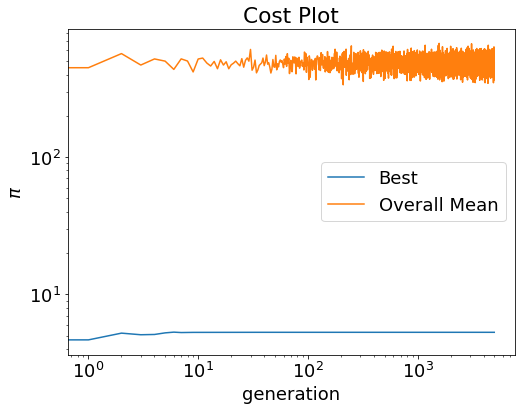

---------------------generation 1 ---------------------
PI_min:  7.4711860896271745
PI_min_last:  6.499871481734131
PI_min_best:  5.556128837851287
λ₁: 3569394182000.939, λ₂: 198009707012.50726, λ₃: 361725015.8698137, λ₄: 71.13172782536549, λ₅: 0.2495534037203871


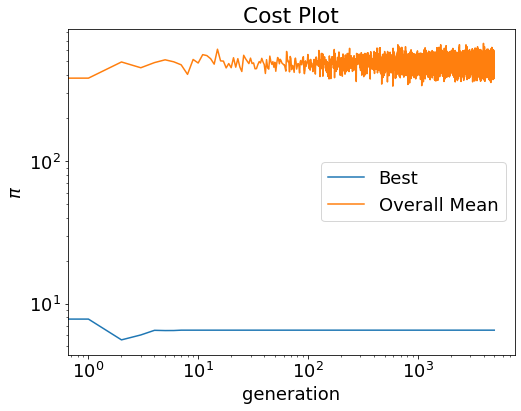

---------------------generation 1 ---------------------
PI_min:  2.913976070900942
PI_min_last:  4.532218105003589
PI_min_best:  2.913976070900942
λ₁: 3603673038325.039, λ₂: 39937274595.53635, λ₃: 265554110.9312546, λ₄: 52.98387158841798, λ₅: 0.38686729721155955


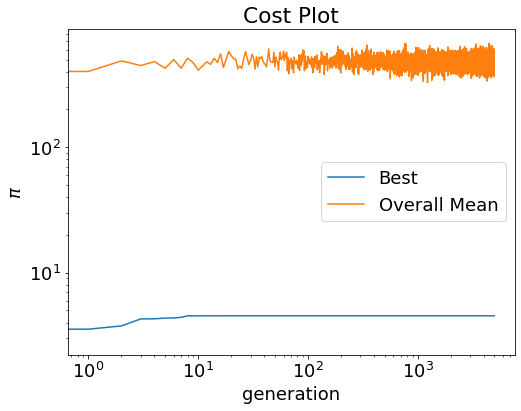

---------------------generation 1 ---------------------
PI_min:  5.302121058716438
PI_min_last:  5.386851797402358
PI_min_best:  5.22961572696139
λ₁: 2878096944643.125, λ₂: 192156962680.63168, λ₃: 292770672.89598566, λ₄: 77.97864527902783, λ₅: 0.2532737793264307


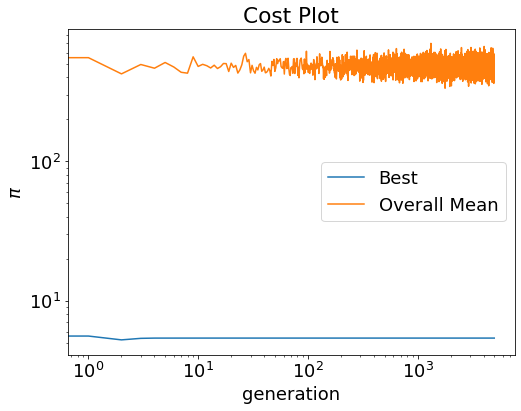

---------------------generation 1 ---------------------
PI_min:  2.5483916581588693
PI_min_last:  2.5348385638868494
PI_min_best:  2.1832089631390197
λ₁: 2683223029587.5073, λ₂: 52356286151.98452, λ₃: 123563580.55678715, λ₄: 62.89966139151381, λ₅: 0.3279748227657497


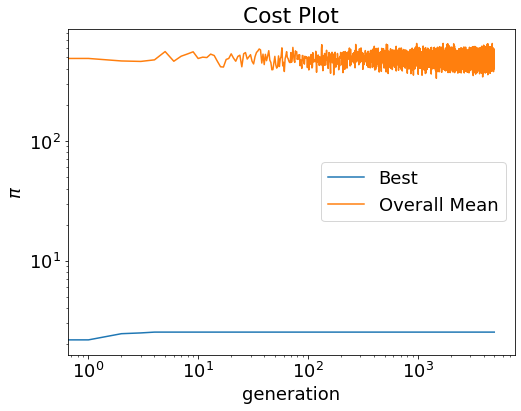

---------------------generation 1 ---------------------
PI_min:  2.768276890980938
PI_min_last:  4.033781138506817
PI_min_best:  2.768276890980938
λ₁: 6324115000672.977, λ₂: 44769314926.80608, λ₃: 88804614.76090692, λ₄: 160.43835336142843, λ₅: 0.05840897715006654


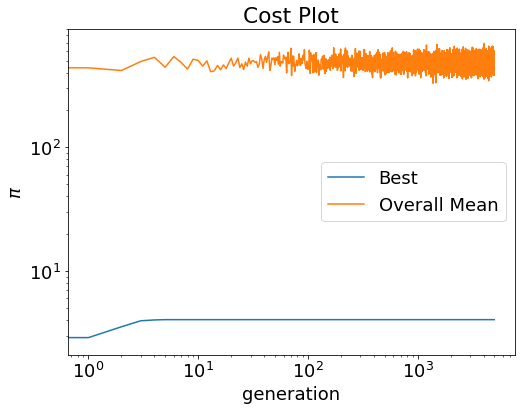

---------------------generation 1 ---------------------
PI_min:  3.973134294736409
PI_min_last:  4.618102332347337
PI_min_best:  3.973134294736409
λ₁: 1607511452255.0842, λ₂: 221440080076.06226, λ₃: 212788228.42180517, λ₄: 7.921155888080687, λ₅: 0.33933936994651503


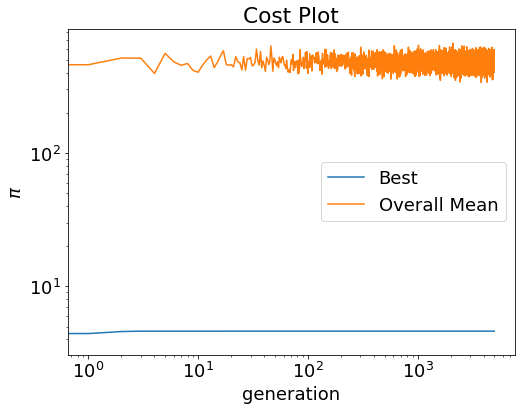

---------------------generation 1 ---------------------
PI_min:  8.254049574991269
PI_min_last:  5.700005031245003
PI_min_best:  5.352308535060936
λ₁: 5454032852044.674, λ₂: 124782744706.25385, λ₃: 485946654.46211255, λ₄: 69.55841248726807, λ₅: 0.30996899621768514


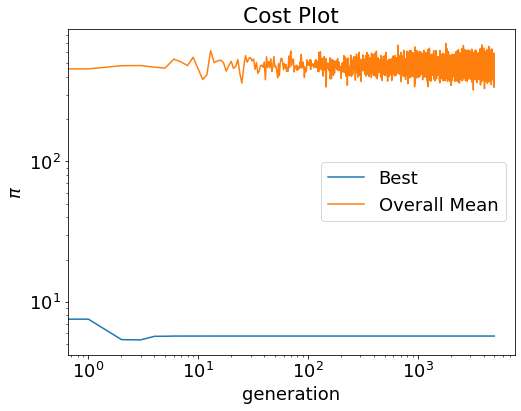

---------------------generation 1 ---------------------
PI_min:  3.4523292760587734
PI_min_last:  5.053933386074924
PI_min_best:  3.4523292760587734
λ₁: 6896590840741.363, λ₂: 30451729080.668674, λ₃: 616625192.1677996, λ₄: 136.48652737417493, λ₅: 0.09361978253740333


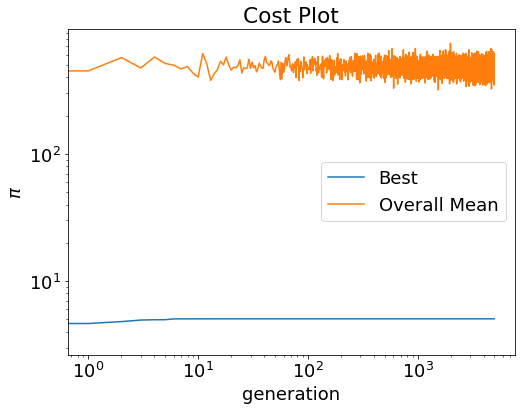

---------------------generation 1 ---------------------
PI_min:  7.842364804713896
PI_min_last:  7.010567937800639
PI_min_best:  6.443193808001007
λ₁: 5789160908639.986, λ₂: 196332657094.5049, λ₃: 517053635.3920302, λ₄: 81.54110004858364, λ₅: 0.2441547857829335


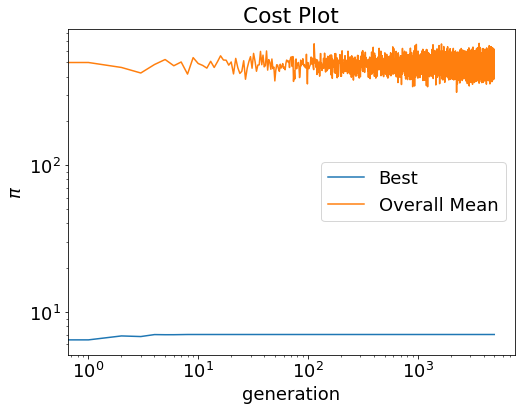

---------------------generation 1 ---------------------
PI_min:  6.23951557220359
PI_min_last:  7.1177763788568065
PI_min_best:  4.413028077457678
λ₁: 4331723228291.034, λ₂: 52757170403.009, λ₃: 773833754.0765333, λ₄: 119.34586563385216, λ₅: 0.19711285088370278


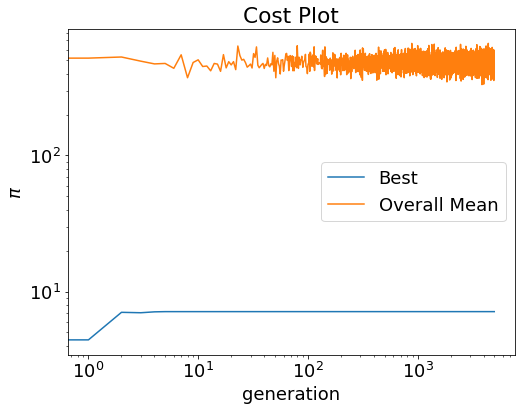

---------------------generation 1 ---------------------
PI_min:  2.3650295946001476
PI_min_last:  3.1376459327527555
PI_min_best:  2.3650295946001476
λ₁: 7500635151779.853, λ₂: 35184933372.90043, λ₃: 243140811.4229327, λ₄: 116.44072113481351, λ₅: 0.192098666612603


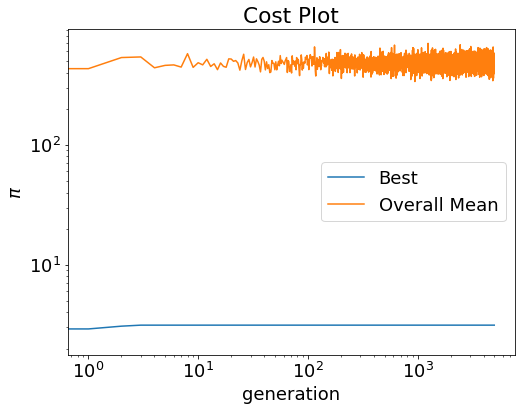

---------------------generation 1 ---------------------
PI_min:  1.9441732694778155
PI_min_last:  2.128692587882072
PI_min_best:  1.9441732694778155
λ₁: 5865227925848.15, λ₂: 33348758866.17348, λ₃: 105973161.86331506, λ₄: 49.717597716000114, λ₅: 0.13439349041044524


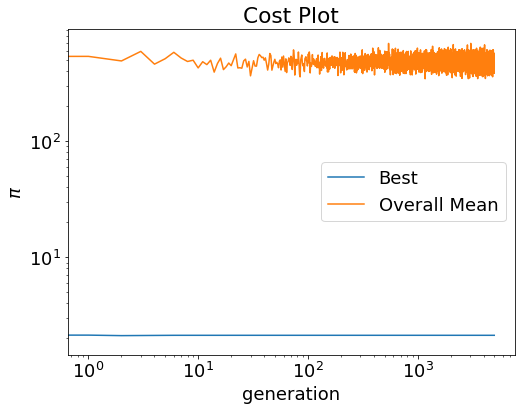

---------------------generation 1 ---------------------
PI_min:  5.517809225709253
PI_min_last:  6.241536556429404
PI_min_best:  5.517809225709253
λ₁: 5850220721814.36, λ₂: 70530800310.85089, λ₃: 758441584.826835, λ₄: 219.10891362739824, λ₅: 0.1760183743871293


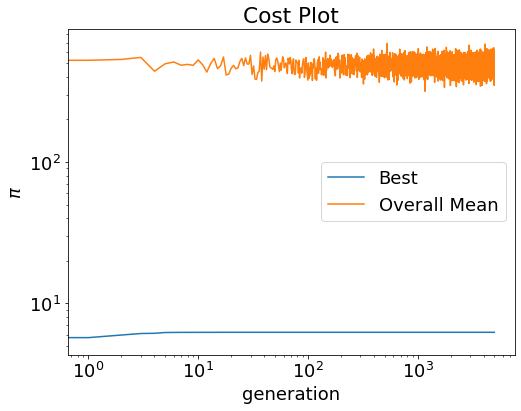

---------------------generation 1 ---------------------
PI_min:  4.061466100099145
PI_min_last:  4.63535584028166
PI_min_best:  3.95775149185805
λ₁: 1678451300391.513, λ₂: 57060281250.278885, λ₃: 80774444.19277743, λ₄: 378.8601507091945, λ₅: 0.09789121438864458


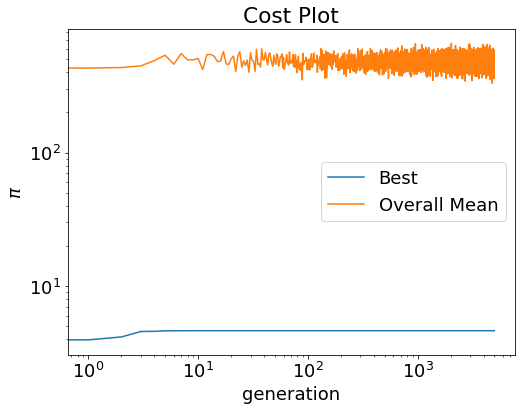

---------------------generation 1 ---------------------
PI_min:  3.2653822522139433
PI_min_last:  3.5926392399736127
PI_min_best:  3.2653822522139433
λ₁: 4992096692060.501, λ₂: 100808555574.80475, λ₃: 21988246.23494777, λ₄: 72.61986009556749, λ₅: 0.21269348597017845


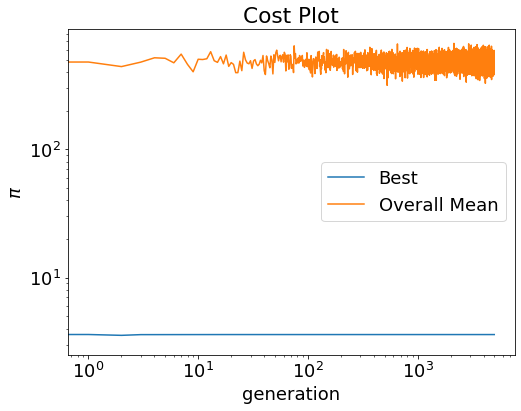

---------------------generation 1 ---------------------
PI_min:  5.991365015619551
PI_min_last:  5.136999180508326
PI_min_best:  4.307271587878609
λ₁: 3264622782288.129, λ₂: 83705243414.76709, λ₃: 373320698.40489006, λ₄: 45.06623558734256, λ₅: 0.38711619435299016


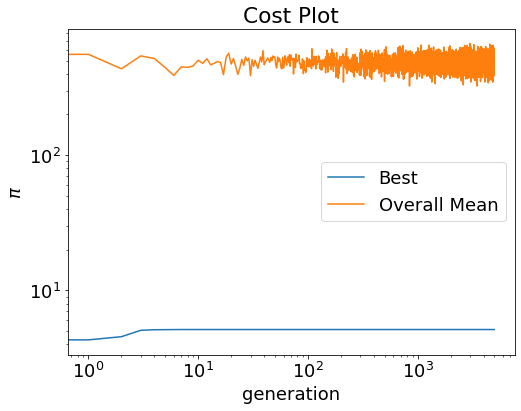

---------------------generation 1 ---------------------
PI_min:  3.7845266210226014
PI_min_last:  3.8190673519000553
PI_min_best:  3.753395584374918
λ₁: 3369892665204.454, λ₂: 55339629533.21414, λ₃: 265614705.4380363, λ₄: 138.65269124196607, λ₅: 0.2683179157157249


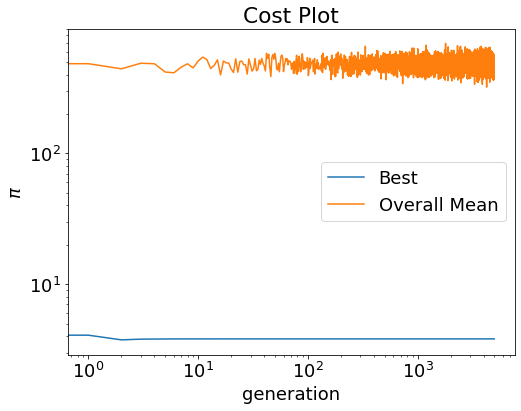

---------------------generation 1 ---------------------
PI_min:  2.474837203754994
PI_min_last:  3.5400178401016005
PI_min_best:  2.474837203754994
λ₁: 2084976548840.487, λ₂: 65476460654.97916, λ₃: 291323793.23176515, λ₄: 52.08251185252325, λ₅: 0.22503052074589236


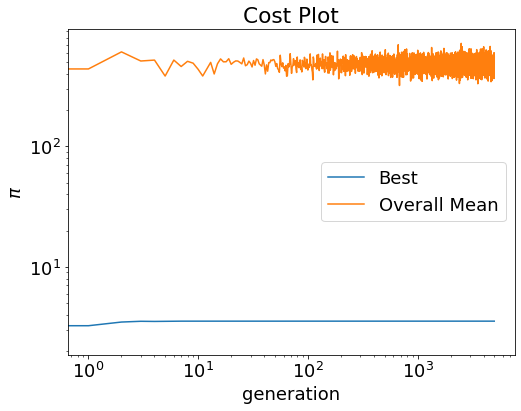

---------------------generation 1 ---------------------
PI_min:  4.495113830635025
PI_min_last:  8.480321962319689
PI_min_best:  4.495113830635025
λ₁: 2755943603795.567, λ₂: 48605196447.76602, λ₃: 262402132.16034582, λ₄: 402.08426497942986, λ₅: 0.04462347948314882


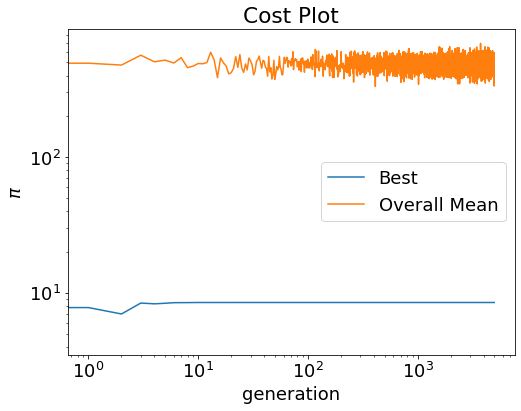

In [29]:
for iter in range(20):
  ##initializing constants
  k_1 = 80*10**9 # Pa                       <---           Phase 1 bulk modulus
  mu_1 = 30*10**9 # Pa                      <---           Phase 1 shear modulus
  sigma_1 = 1.0*10**7 # S/m                 <---           Phase 1 electrical conductivity
  Kappa_1 = 4.3 # W/m-K                         <---           Phase 1 thermal conductivity
  k_D = 111*10**9 # Pa                      <---           Desired Effective Bulk Modulus
  mu_D = 47*10**9 # Pa                      <---           Desired Effective Shear Modulus
  sigma_D = 2.1*10**7 # S/m                 <---           Desired Effective Electrical Conductivity
  Kappa_D = 6.2 # W/m-K                         <---           Desired Effective Thermal Conductivity
  TOL_k = 0.5 #                             <---           Bulk Modulus Tolerance
  TOL_mu = 0.5 #                            <---           Shear Modulus Tolerance
  TOL_sigma = 0.8 #                         <---           Electrical Tolerance
  TOL_Kappa = 0.5 #                             <---           Thermal Tolerance
  w = 0.8 #                                 <---           Concentration tensor weights
  w_1 = 1 #                                 <---           Material property matching cost function weights


  # Genetic Algorithm for Material Optimization
  # Initializing genetic algorithm parameters
  children = 10 #                           <---           number of children
  parent = 10 #                             <---           number of parents
  S = 200 #                                 <---           number of genes
  G = 5000 #                                <---           total generation

  W_1 = 1/3 #                               <---           cost function weight
  W_2 = 1/3 #                               <---           cost function weight
  W_3 = 1/3 #                               <---           cost function weight

  # random number genration
  rng = np.random.default_rng()

  # generating k array of size S of values between 
  k_2 = 99*k_1*rng.random((S,1)) + k_1

  # generating mu array of size S of values between 
  mu_2 = 99*mu_1*rng.random((S,1)) + mu_1

  # generating sigma array of size S of values between 
  sigma_2 = 99*sigma_1*rng.random((S,1)) + sigma_1

  # generating K array of size S of values between 
  Kappa_2 = 99*Kappa_1*rng.random((S,1)) + Kappa_1

  # generating v array of size S of values between 
  v_2 = rng.random((S,1))
  v_1 = 1-v_2                         # ######### # <----  Double check this value

  # organizing the tunable parameter generated for the genetic algorithm
  Lambda = np.hstack([k_2, mu_2, sigma_2, Kappa_2, v_2])

  #evaluating k_str, mu_str, sigma_str, K_str
  k_strpls = k_2 + (1 - v_2)/(1/(k_1 - k_2) + 3*v_2/(3*k_2 + 4*mu_2))
  k_strmns = k_1 + v_2/(1/(k_2 - k_1) + 3*(1 - v_2)/(3*k_1 + 4*mu_1))
  k_str = (k_strpls + k_strmns)/2

  mu_strpls = mu_2 + (1 - v_2)/(1/(mu_1 - mu_2) + 6*v_2*(k_2 + 2*mu_2)/(5*mu_2*(3*k_2 + 4*mu_2)))
  mu_strmns = mu_1 + v_2/(1/(mu_2 - mu_1) + 6*(1-v_2)*(k_1 + 2*mu_1)/(5*mu_1*(3*k_1 + 4*mu_1)))
  mu_str = (mu_strpls + mu_strmns)/2

  sigma_strpls = sigma_2 + (1 - v_2)/(1/(sigma_1 - sigma_2) + v_2/(3*sigma_2))
  sigma_strmns = sigma_1 + v_2/(1/(sigma_2 - sigma_1) + (1-v_2)/(3*sigma_1))
  sigma_str = (sigma_strpls + sigma_strmns)/2

  Kappa_strpls = Kappa_2 + (1 - v_2)/(1/(Kappa_1 - Kappa_2) + v_2/(3*Kappa_2))
  Kappa_strmns = Kappa_1 + v_2/(1/(Kappa_2 - Kappa_1) + (1-v_2)/(3*Kappa_1))
  Kappa_str = (Kappa_strpls + Kappa_strmns)/2

  # evaluating C_sigma_k2, C_sigma_k1, C_sigma_mu2, C_sigma_mu1 for mechanical properties
  C_sigma_k2 = k_2*(k_str-k_1)/(v_2*k_str*(k_2-k_1))
  C_sigma_mu2 = mu_2*(mu_str-mu_1)/(v_2*mu_str*(mu_2-mu_1))

  C_sigma_k1 = (1 - v_2*C_sigma_k2**2)/v_1
  C_sigma_mu1 = (1 - v_2*C_sigma_mu2**2)/v_1


  # evaluating C_j1C_e1 and C_j1C_e1 for electrical properties
  C_j1C_e1 = sigma_1 * ((sigma_2 - sigma_str)/((1-v_2)*(sigma_2 - sigma_1)))**2 / sigma_str
  C_j2C_e2 = sigma_2 * ((sigma_str - sigma_1)/(v_2*(sigma_2 - sigma_1)))**2 / sigma_str

  # evaluating C_q1 and C_q2 for thermal properties
  C_theta2 = (Kappa_str - Kappa_1)/(v_2*(Kappa_2 - Kappa_1)) 
  C_theta1 = (1 - v_2*C_theta2)/(1 - v_2)
  C_q2 = Kappa_2*C_theta2/Kappa_str
  C_q1 = (1 - v_2*C_q2)/(1 - v_2)

  # running the numerical simulation for the mechical properties
  pi_mechanical = np.array([w_1*((k_D-k_str[i])/k_D)**2 + w_1*((mu_D-mu_str[i])/mu_D)**2 + int(C_sigma_k2[i] > TOL_k)*w*((C_sigma_k2[i] - TOL_k)/TOL_k)**2 + int(C_sigma_mu2[i] > TOL_mu)*w*((C_sigma_mu2[i] - TOL_mu)/TOL_mu)**2 + int(C_sigma_k1[i] > TOL_k)*w*((C_sigma_k1[i] - TOL_k)/TOL_k)**2 + int(C_sigma_mu1[i] > TOL_mu)*w*((C_sigma_mu1[i] - TOL_mu)/TOL_mu)**2 for i in range(S)])

  # running the numerical simulation for the electrical properties
  pi_electrical = np.array([w_1*((sigma_D-sigma_str[i])/sigma_D)**2 + int(C_j1C_e1[i] > TOL_sigma)*w*((C_j1C_e1[i] - TOL_sigma)/TOL_sigma)**2 + int(C_j2C_e2[i] > TOL_sigma)*w*((C_j2C_e2[i] - TOL_sigma)/TOL_sigma)**2 for i in range(S)])

  # running the numerical simulation for the thermal properties
  pi_thermal = np.array([w_1*((Kappa_D - Kappa_str[i])/Kappa_D)**2 + int(C_q1[i] > TOL_sigma)*w*((C_q1[i] - TOL_sigma)/TOL_sigma)**2 + int(C_q2[i] > TOL_sigma)*w*((C_q1[i] - TOL_sigma)/TOL_sigma)**2 for i in range(S)])

  # sim_res = [trnsTempSim(21, Lambda[i,0],Lambda[i,1]) for i in range(S)]

  # evaluating the cost of each member of the population
  new_pi = W_1*pi_mechanical + W_2*pi_electrical + W_3*pi_thermal

  # initializing the generation count
  g = 1

  # labeling the data
  dtype = [('Lambda1', float), ('Lambda2', float), ('Lambda3', float), ('Lambda4', float), ('Lambda5', float), ('new_pi', float)]

  # Organzing the data for each member of the population
  Pi=[]
  for _ in range(S):
      Pi.append((Lambda[_][0], Lambda[_][1], Lambda[_][2], Lambda[_][3], Lambda[_][4], float(new_pi[_])))

  # converting to an array and sorting the list of the population over the new pi
  Pi1 = np.array(Pi, dtype=dtype)
  Sorted_Pi = np.sort(Pi1, order='new_pi')

  g = 1

  # initializing variable tracking the GA performance
  Parent_avg = []
  PI_avg = []
  PI_min = []
  PI_min_best = []
  Sol1 = []
  Sol2 = []
  Sol3 = []
  Sol4 = []
  Sol5 = []

  PI_min.append(Sorted_Pi['new_pi'][0])
  PI_min_best.append(Sorted_Pi['new_pi'][0])
  Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
  PI_avg.append(Sorted_Pi['new_pi'].mean())
  Sol1.append(Sorted_Pi['Lambda1'][0])
  Sol2.append(Sorted_Pi['Lambda2'][0])
  Sol3.append(Sorted_Pi['Lambda3'][0])
  Sol4.append(Sorted_Pi['Lambda4'][0])
  Sol5.append(Sorted_Pi['Lambda5'][0])
  print('---------------------generation', g, '---------------------')
  # print('K_o: ', Sol1[-1], '\nfl: ', Sol2[-1])
  print('PI_min: ', PI_min[-1])
  #==========================================================================================================================
  # genetic algorithm iteration
  while g<G:
      g+=1
      for p in 2*np.arange(0,5):
          phi1 = rng.random()
          phi2 = rng.random()
          phi3 = rng.random()
          phi4 = rng.random()
          phi5 = rng.random()
          phi1a = rng.random()
          phi2a = rng.random()
          phi3a = rng.random()
          phi4a = rng.random()
          phi5a = rng.random()
          
          ## mating parents to produce children that replaces worse parents
          Sorted_Pi['Lambda1'][p], Sorted_Pi['Lambda1'][p+1] =  phi1*Sorted_Pi['Lambda1'][p] + (1-phi1)*Sorted_Pi['Lambda1'][p+1], phi1a*Sorted_Pi['Lambda1'][p] + (1-phi1a)*Sorted_Pi['Lambda1'][p+1]
          Sorted_Pi['Lambda2'][p], Sorted_Pi['Lambda2'][p+1] =  phi2*Sorted_Pi['Lambda2'][p] + (1-phi2)*Sorted_Pi['Lambda2'][p+1], phi2a*Sorted_Pi['Lambda2'][p] + (1-phi2a)*Sorted_Pi['Lambda2'][p+1]
          Sorted_Pi['Lambda3'][p], Sorted_Pi['Lambda3'][p+1] =  phi3*Sorted_Pi['Lambda3'][p] + (1-phi3)*Sorted_Pi['Lambda3'][p+1], phi3a*Sorted_Pi['Lambda3'][p] + (1-phi3a)*Sorted_Pi['Lambda3'][p+1]
          Sorted_Pi['Lambda4'][p], Sorted_Pi['Lambda4'][p+1] =  phi4*Sorted_Pi['Lambda4'][p] + (1-phi4)*Sorted_Pi['Lambda4'][p+1], phi4a*Sorted_Pi['Lambda4'][p] + (1-phi4a)*Sorted_Pi['Lambda4'][p+1]
          Sorted_Pi['Lambda5'][p], Sorted_Pi['Lambda5'][p+1] =  phi5*Sorted_Pi['Lambda5'][p] + (1-phi5)*Sorted_Pi['Lambda5'][p+1], phi5a*Sorted_Pi['Lambda5'][p] + (1-phi5a)*Sorted_Pi['Lambda5'][p+1]

          ##evaluating new pi
          Sorted_Pi['new_pi'][p] =  PI_function(Sorted_Pi['Lambda1'][p], Sorted_Pi['Lambda2'][p], Sorted_Pi['Lambda3'][p], Sorted_Pi['Lambda4'][p], Sorted_Pi['Lambda5'][p])
          Sorted_Pi['new_pi'][p+1] =  PI_function(Sorted_Pi['Lambda1'][p+1], Sorted_Pi['Lambda2'][p+1], Sorted_Pi['Lambda3'][p+1], Sorted_Pi['Lambda4'][p+1], Sorted_Pi['Lambda5'][p+1])
          
          
          
      ## generating new random values
      for N in range(10,S):
          Sorted_Pi['Lambda1'][N] =  k_1*rng.random() + 100*k_1
          Sorted_Pi['Lambda2'][N] =  mu_1*rng.random() + 100*mu_1
          Sorted_Pi['Lambda3'][N] =  sigma_1*rng.random() + 100*sigma_1
          Sorted_Pi['Lambda4'][N] =  Kappa_1*rng.random() + 100*Kappa_1
          Sorted_Pi['Lambda5'][N] =  rng.random()
          
          ##evaluating new pi
          Sorted_Pi['new_pi'][N] =  PI_function(Sorted_Pi['Lambda1'][N], Sorted_Pi['Lambda2'][N], Sorted_Pi['Lambda3'][N], Sorted_Pi['Lambda4'][N], Sorted_Pi['Lambda5'][N])
          
      ## sorting and appending values    
      Sorted_Pi = np.sort(Sorted_Pi, order='new_pi')
      PI_min.append(Sorted_Pi['new_pi'][0])
      if Sorted_Pi['new_pi'][0] < PI_min_best[-1]:
        PI_min_best.append(Sorted_Pi['new_pi'][0])
        Sol1.append(Sorted_Pi['Lambda1'][0])
        Sol2.append(Sorted_Pi['Lambda2'][0])
        Sol3.append(Sorted_Pi['Lambda3'][0])
        Sol4.append(Sorted_Pi['Lambda4'][0])
        Sol5.append(Sorted_Pi['Lambda5'][0])

      # Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
      PI_avg.append(Sorted_Pi['new_pi'].mean())
      
      # print('---------------------generation', g, '---------------------')
      # # print('K_o: ', Sol1[-1], '\nfl: ', Sol2[-1])
      # print('PI_min: ', PI_min[-1])
      # print('Parent_avg: ', Parent_avg[-1])

  # Plotting solution
  print('PI_min_last: ', PI_min[-1])
  print('PI_min_best: ', PI_min_best[-1])
  print(f'\u03BB₁: {Sol1[-1]}, \u03BB₂: {Sol2[-1]}, \u03BB₃: {Sol3[-1]}, \u03BB₄: {Sol4[-1]}, \u03BB₅: {Sol5[-1]}')
  fig = plt.figure(figsize = (8,6))
  plt.rcParams.update({'font.size': 18})
  plt.plot(PI_min, label = 'Best')
  # plt.plot(Parent_avg, label = 'Parent Mean')
  plt.plot(PI_avg, label = 'Overall Mean')
  # plt.plot(Sol1, label = '$\lambda1$')
  # plt.plot(Sol2, label = '$\lambda2$')
  # naming the x axis
  plt.xlabel('generation')
  # naming the y axis
  plt.ylabel('$\pi$')
  # giving a title to my graph
  plt.title('Cost Plot')
  plt.loglog()
  plt.legend()
  # plt.savefig('Proj_2_figure_'+str(iter))
  plt.show()